# Description

# Monte Carlo Simulation of a Simple Lattice Gas

This Jupyter Notebook demonstrates a Monte Carlo simulation of a simple lattice gas
using the Metropolis-Hastings algorithm. The system consists of particles occupying sites
on a 2D lattice, interacting via an attractive potential.

## Theoretical Background
The lattice gas model is equivalent to the Ising model, where each lattice site can be either
occupied (particle present, represented by 1) or empty (particle absent, represented by 0).
Particles interact with their nearest neighbors with an attractive energy $-J$.

The Hamiltonian of the system is given by:

$$ H = -J \sum_{\langle i, j \rangle} n_i n_j $$

where:
- $J > 0$ represents the attractive interaction between nearest neighbors,
- $n_i = 1$ if a site is occupied, $0$ if empty,
- The summation runs over all nearest-neighbor pairs.

We use the Metropolis algorithm to update the system and study the density fluctuations,
which reveal phase separation at low temperatures.


# Monte Carlo Simulation of a Simple Lattice Gas

This Jupyter Notebook demonstrates a Monte Carlo simulation of a simple lattice gas
using the Metropolis-Hastings algorithm. The system consists of particles occupying sites
on a 2D lattice, interacting via an attractive potential.

## Theoretical Background
The lattice gas model is equivalent to the Ising model, where each lattice site can be either
occupied (particle present, represented by 1) or empty (particle absent, represented by 0).
Particles interact with their nearest neighbors with an attractive energy $-J$.

The Hamiltonian of the system is given by:

angle} n_i n_j $langle i, j 

where:
- $J > 0$ represents the attractive interaction between nearest neighbors,
- $n_i = 1$ if a site is occupied, $0$ if empty,
- The summation runs over all nearest-neighbor pairs.

We use the Metropolis algorithm to update the system and study the density fluctuations,
which reveal phase separation at low temperatures.



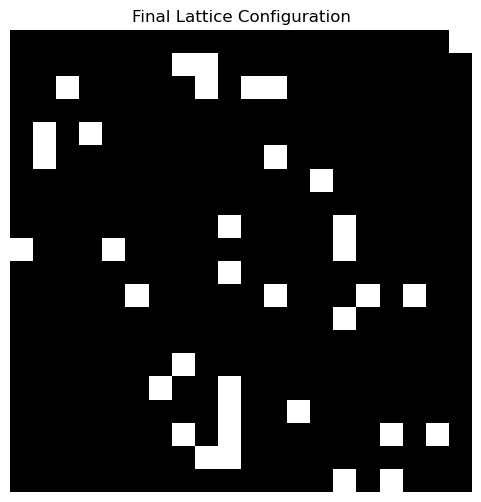

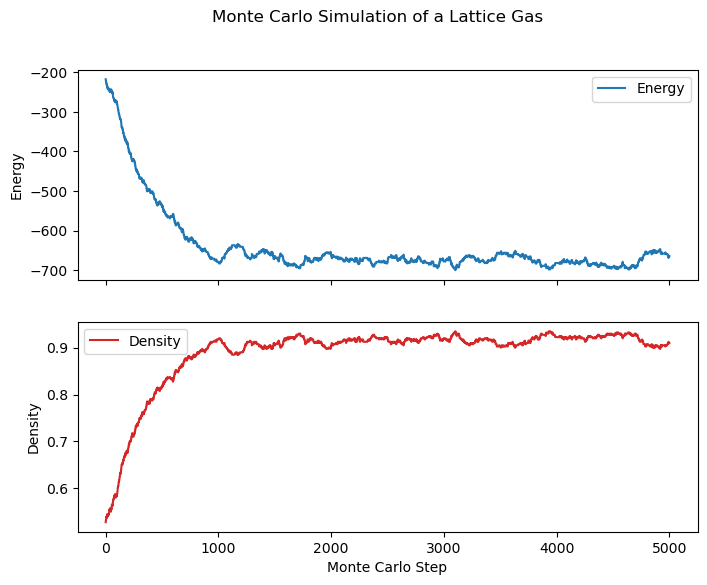

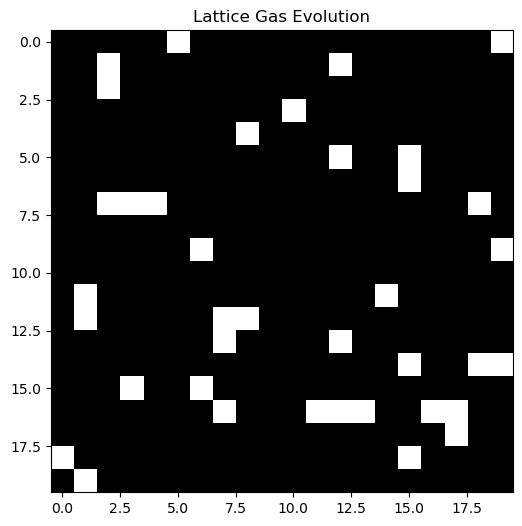

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML



# Parameters
L = 20  # Lattice size (L x L)
T = 1.5  # Reduced Temperature
J = 1.0  # Interaction strength
steps = 5000  # Monte Carlo steps
initial_density = 0.5  # Fraction of sites occupied initially

# Initialize Lattice (random occupancy with given density)
lattice = (np.random.rand(L, L) < initial_density).astype(int)

# Function to compute total energy
def compute_energy(lattice, J):
    energy = 0
    for i in range(L):
        for j in range(L):
            if lattice[i, j] == 1:  # Only count interactions for occupied sites
                # Nearest-neighbor interactions
                neighbors = (
                    lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j] +
                    lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L]
                )
                energy -= J * neighbors
    return energy / 2  # Each pair counted twice

# Monte Carlo Simulation using Metropolis Algorithm
energies = []
densities = []

for step in range(steps):
    # Select a random site
    i, j = np.random.randint(0, L, size=2)
    
    # Flip occupation: If occupied, remove; if empty, add a particle
    delta_n = -1 if lattice[i, j] == 1 else 1
    
    # Compute energy difference
    neighbors = (
        lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j] +
        lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L]
    )
    dE = -J * delta_n * neighbors
    
    # Metropolis criterion
    if dE < 0 or np.random.rand() < np.exp(-dE / T):
        lattice[i, j] += delta_n  # Update site occupation
    
    # Store observables
    energies.append(compute_energy(lattice, J))
    densities.append(lattice.sum() / (L * L))

# Plot Final Lattice Configuration
plt.figure(figsize=(6, 6))
plt.imshow(lattice, cmap="Greys", interpolation="nearest")
plt.title("Final Lattice Configuration")
plt.axis("off")
plt.show()

# Plot Energy and Density Over Time
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)
axs[0].plot(energies, label="Energy", color="tab:blue")
axs[0].set_ylabel("Energy")
axs[0].legend()

axs[1].plot(densities, label="Density", color="tab:red")
axs[1].set_ylabel("Density")
axs[1].set_xlabel("Monte Carlo Step")
axs[1].legend()

plt.suptitle("Monte Carlo Simulation of a Lattice Gas")
plt.show()

# Animation Setup
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Lattice Gas Evolution")
cmap = plt.get_cmap("Greys")

im = ax.imshow(lattice, cmap=cmap, interpolation="nearest")

def update(frame):
    for _ in range(100):  # Perform multiple steps per frame for better visualization
        i, j = np.random.randint(0, L, size=2)
        delta_n = -1 if lattice[i, j] == 1 else 1
        neighbors = (
            lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j] +
            lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L]
        )
        dE = -J * delta_n * neighbors
        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            lattice[i, j] += delta_n
    im.set_array(lattice)
    return im,

ani = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=False)
display(HTML(ani.to_jshtml()))
